### Step 1 — Build Baseline CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Block 3
    layers.Conv2D(128, (3,3), activation='relu'),
    
    # Classifier
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2026-02-21 16:48:39.195432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-21 16:48:39.203942: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-21 16:48:39.619966: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-21 16:48:41.741100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

### Step 2 — Compile Model

In [2]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Step 3 — Train

In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.4530 - loss: 1.5021 - val_accuracy: 0.5418 - val_loss: 1.2985
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6034 - loss: 1.1277 - val_accuracy: 0.6275 - val_loss: 1.0370
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6638 - loss: 0.9595 - val_accuracy: 0.6388 - val_loss: 1.0346
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7049 - loss: 0.8452 - val_accuracy: 0.6831 - val_loss: 0.9256
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7321 - loss: 0.7622 - val_accuracy: 0.6656 - val_loss: 0.9751
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7572 - loss: 0.6895 - val_accuracy: 0.6962 - val_loss: 0.9002
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7832 - loss: 0.6230 - val_accuracy: 0.7122 - val_loss: 0.8770
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8033 -

### Step 4 — Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7121 - loss: 0.9473
Test Accuracy: 0.7121000289916992


### Plot Learning Curves

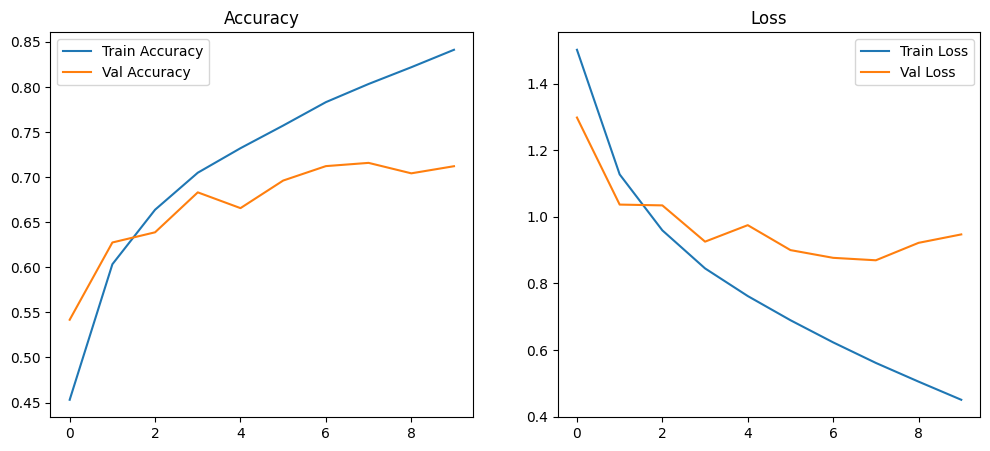

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

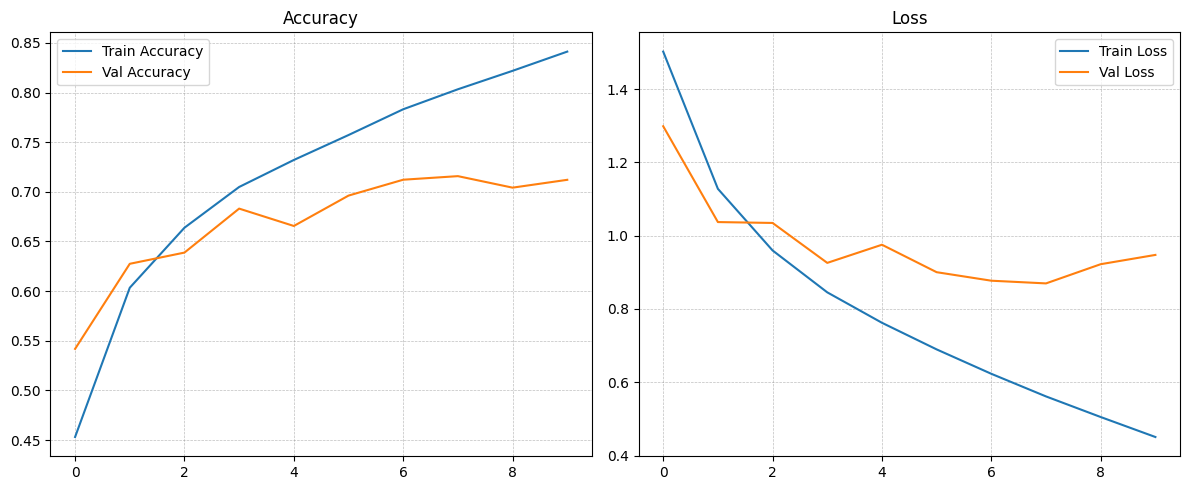

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[0].set_title("Accuracy")
ax[0].legend()
ax[0].grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_title("Loss")
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

Now we analyze properly.

## 📈 Accuracy Curve (Left)

* Training accuracy steadily increases → 45% → ~84%
* Validation accuracy increases initially → peaks around ~71–72%
* After epoch ~6–7, validation accuracy **stops improving**

### What This Means:

Your model is learning patterns from training data well.
But after some point, it stops generalizing better.

There is a **clear gap (~13%) between train and validation accuracy** at the end.

That indicates:

> 🔴 Mild to moderate overfitting

---

## 📉 Loss Curve (Right)

* Training loss keeps decreasing smoothly.
* Validation loss decreases initially.
* After around epoch 6–7, validation loss **starts increasing slightly**.

This confirms:

> 🔴 Overfitting starts around epoch 6–7.

The model begins memorizing training data instead of improving generalization.

---

# Diagnosis Summary

| Observation           | Meaning                      |
| --------------------- | ---------------------------- |
| Train ↑ continuously  | Model capacity is good       |
| Val accuracy plateaus | Generalization limit reached |
| Val loss rises        | Overfitting                  |
| Gap ~13%              | Needs regularization         |

---

# Correct Next Step (Scientific)

Do NOT increase model size.

We must reduce overfitting.

Next improvement:

👉 Add **Data Augmentation**

This forces model to see slightly modified images and generalize better.

If done properly, accuracy should go to:

* ~78–82%